<a href="https://colab.research.google.com/github/Harshalkumar96/Play_Store_App_Review_EDA_Project/blob/main/Google_App_Rating_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, customer reviews of the android apps and more.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction**

Application distribution platform, for example, Play Store gets overwhelmed with millions of new applications being launched on the platform regularly. Lots of designers and developers work on it to make an app successful on the Play Store. In this highly competitive world, it is an immense challenge for a developer to know whether they are focusing on the right path to make their app successful on the platform.

To launch themselves successfully and create an identity for themselves in this oversaturated market, they need to ensure that majority of the essential factors are incorporated while designing and developing an app that would play an important role in customer's decision-making process. However, the lack of a clear understanding of the inner working and dynamic of popular app markets impacts both the developers and users.

The main objective of this exploratory data analysis project is to understand customer demands better and thus help developers to popularize their product on the Play Store.

# **Problem Statements**

1. What are the top categories on Play Store?
2. Are majority of the apps Paid or Free?
3. How importance is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Which category has the most no. of installations?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps? 

# **What is Exploratory Data Analysis?**

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:
1. <b>Problem Statement</b> - We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.
2. <b>Hypothesis</b> - Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.
3. <b>Univariate Analysis</b> - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
4. <b>Bivariate Analysis</b> - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
5. <b>Multivariate Analysis</b> - This is done when more than two variables have to be analyzed simultaneously.
5. <b>Data Cleaning</b> - We shall clean the dataset and handle the missing data, outliers and categorical variables.
6. <b>Testing Hypothesis</b> - We shall check if our data meets the assumptions required by most of the multivariate techniques.

## # It's time to **HAVE FUN** with the **DATASET** now!!!

**Columns Provided**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1. **App** - It tells us about the name of the application.
2. **Category** - It tells us about the category to which an application belongs.
3. **Rating** - It tells us about the ratings given by the users for a specific application.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - It tells us whether the application is free or a paid one.
8. **Price** - It tells us about the price of the application.
9. **Content_Rating** - It tells us about the target audience for the application.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last_Updated** - It tells us about the when the application was updated.
12. **Current_Ver** - It tells us about the current version of the application.
13.**Android_Ver** - It tells us about the android version which can support the application on its platform.

In [2]:
# Importing Essential Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read .csv file and store it in variable

path = ('/content/drive/MyDrive/Capstone Projects csv/googleplaystore.csv')
df = pd.read_csv(path)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Understanding our Dataset

In [6]:
# Show top 5 rows of our data

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Show last 5 rows of our data

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
# number of rows and columns in dataset

df.shape

(10841, 13)

In [9]:
# Showing number of Rows and Columns present in our Dataset 

print(f'Our dataset consist of {df.shape[0]} Rows & {df.shape[1]} Columns')

Our dataset consist of 10841 Rows & 13 Columns


In [10]:
# Let's see some statistics of Numberical Columns in dataset

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Note >** Since we have only on Numerical Column (Rating) so df.describe() showed us only one column 

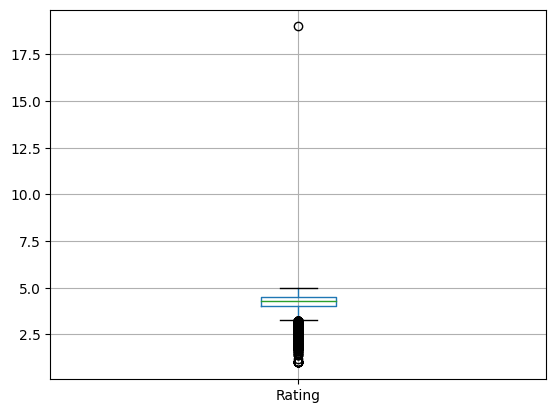

In [12]:
# Checking for outliers using Boxplot

df.boxplot();

Boxplot shows us the Numerical data's plot , So that we can check for any presence of Outliers in our data

And as we can observe above we've found outlier in "Rating" column

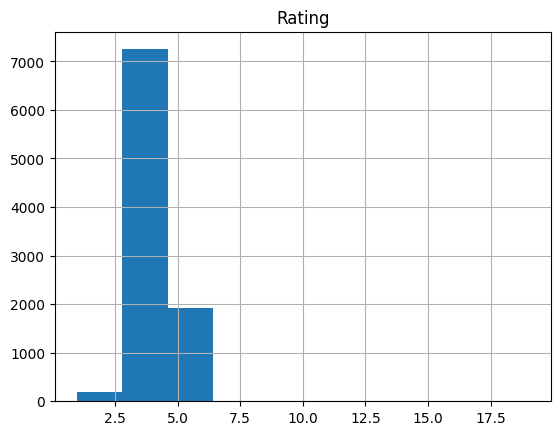

In [13]:
# Now let's see with the help of Histogram also

df.hist();

**Observation >** So we can see above in Histogram the Average values of rating is 4.5, but our rading for histogram is showing Numbers upto 17.5 on X-axis, so we can conclude that their might be few outliers beyond 17.5 

In [14]:
# Checking for how many outliers are there in Rating Column
# As we can see in Boxplot that most of Rating lie between 0-5, So ratings more that 5 are considered as oultiers 

df[df.Rating>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Observation >** So we can see above, we've got only 1 outlier their in our "Rating" column

So we can simply drop that row in "Rating" column to get rid off the outlier, Since it is a single row so dropping it will not impact our Results , so we will Remove that row in further Data Cleaning steps of our EDA 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can observer the Number of columns, their names and also their Datatypes above

Also we can see that we only ave 1 Numerical column ("Rating) in our dataset, rest of all columns are of Str datatype  

In [16]:
# Checking for Null Values in dataset

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Observation >** We have highest NaN values in "Rating" Column (1474 NaN values) , single NaN value in "Type" & "Content Rating" columns respectively and in "Android Ver" column we got 3 NaN values 

#**Data Cleaning**

So we've found the one outlier in our "Rating" column above, let's see that again

In [17]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Row 10472 has the outlier, so we are removing that row now

In [18]:
# Removing Outlier

df.drop([10472], inplace=True)

In [19]:
# Check whether row got deleted or not

df[10470 : 10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


Yes, we can see above row number 10472 is now removed from our dataset

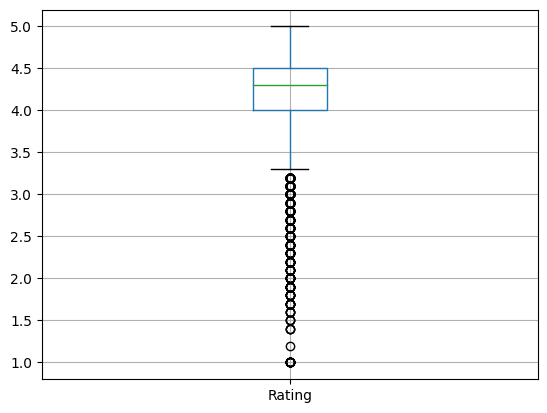

In [20]:
# Again checking for outlier with Boxplot

df.boxplot();

**Observation >** Now we can see in the Boxplot that the outlier value which were present above 17.5 in our earlier Boxplot Visualization is not appearing now 

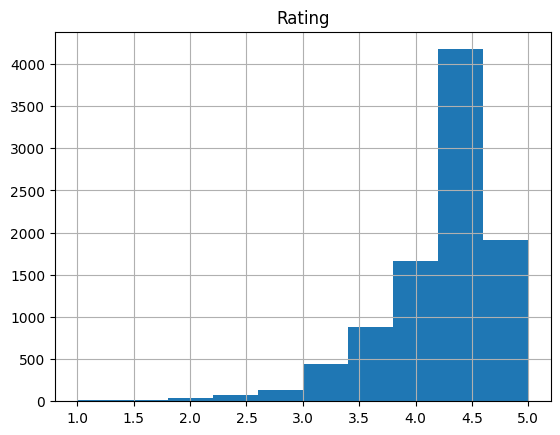

In [21]:
df.hist();

**Observation >** Alos in Histogram, Now we can see values only between 0-5

In [22]:
# Now we are finding the columns which are 90% empty (10% filled column) 

x = len(df) * (10/100)                         #we r storing count of 10% rows in variable here
x

1084.0

In [23]:
# Here we are checking which column is 90% Empty or (say only 10% filled) -- So that we can simply remove such columns

for i in df.columns:
  if (df[i].count()) >= x:
    print(df[i].count(), f'is "{i}" column length, Since it is greater than 10% we cannot remove this column \n')
  else:
    print(df[i].count(), f'is "{i}" column length, Since it is greater than 10% we cannot remove this column \n')


10840 is "App" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Category" column length, Since it is greater than 10% we cannot remove this column 

9366 is "Rating" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Reviews" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Size" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Installs" column length, Since it is greater than 10% we cannot remove this column 

10839 is "Type" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Price" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Content Rating" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Genres" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Last Updated" column length, Since it is greater than 10

So as we can observe that no any column is 90% empty so we cannot remove any column

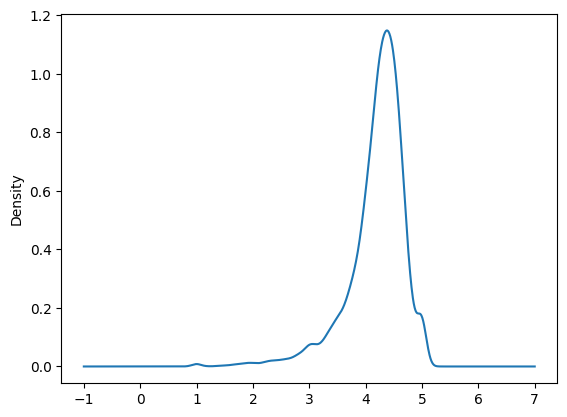

In [24]:
# Let's Visualize the data distribution of "Rating" column since it is having highest NaN values

df['Rating'].plot(kind='kde');

**Observation >** Our "Rating" column contains higher NaN values than any other column in dataset, So we can't just remove it's NaN values, Because will loose much data if we remove the NaN from "Rating" column

Now above in it's Data distribution we can see that it is following the left skewed distribution, So due to it is skewed data distribution we will now replacing it's NaN values by Median

In [25]:
# Now let's fill "Rating" columns using Median

df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [26]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Observation >** Now we can see above it is showing 0 NaN values in Rating column

Now we've only "Type", "Current Ver", "Android Ver" Columns are left with the NaN values, Since these columns containing the non-integer data, or also they have few NaN values, so we will replace their NaN values with Mode

In [27]:
# find the Mode of "Type", "Current Ver", "Android Ver" Columns

print(df["Type"].mode())
print(df["Current Ver"].mode())
print(df["Android Ver"].mode())


0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [28]:
# Now fill the NaN with Mode for above 3 columns

df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)


In [29]:
# Now check for NaN again

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Observation >** Now we can see above that all the NaN values from our dataset are handelled successfully

In [30]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**Observation >**  

1.   Now from above we caan observe that our "Reviews" column contains Numerical data, still it's datatype is shown as object (Str), So we need to change it's datatype to Numeric 
2.   Same condition with the "Installs" column, also it contains "+" saign in it that sign we don't need at all, so we will remove that also
3.   Same thing we will do with the "Price" Column also, we will replace its "$" sign with empty string





In [32]:
# Here we r replacing "$" sign in 'Price' column with "" empty string
# and converting data in "Reviews" column to numeric data

df['Price'] = df['Price'].apply((lambda x: str(x).replace('$', '') if '$' in str(x) else str(x)))
df['Price'] = df['Price'].apply((lambda x: float(x)))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [33]:
# Here we r replacing "+" & "," in 'Installs' column to empty string

df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x : float(x))


In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


**Observation >** Now we can see above that our data set is now much Neat & clean, since we've done some IMP Manipulations on it, 

we've now 4 Numerical columns

### Data Visualization

Now we want to see the Average of "Installs", "Reviews" column & sum if "Price", for each individual category of Apps  

In [37]:
# we've groupby the "Category" column below and doing aggrigation operation on other columns

grp = df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Reviews'].agg(np.mean)
z = grp['Price'].agg(np.sum)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

<ipython-input-38-a1e77738db09>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, 'ro-', color='b')


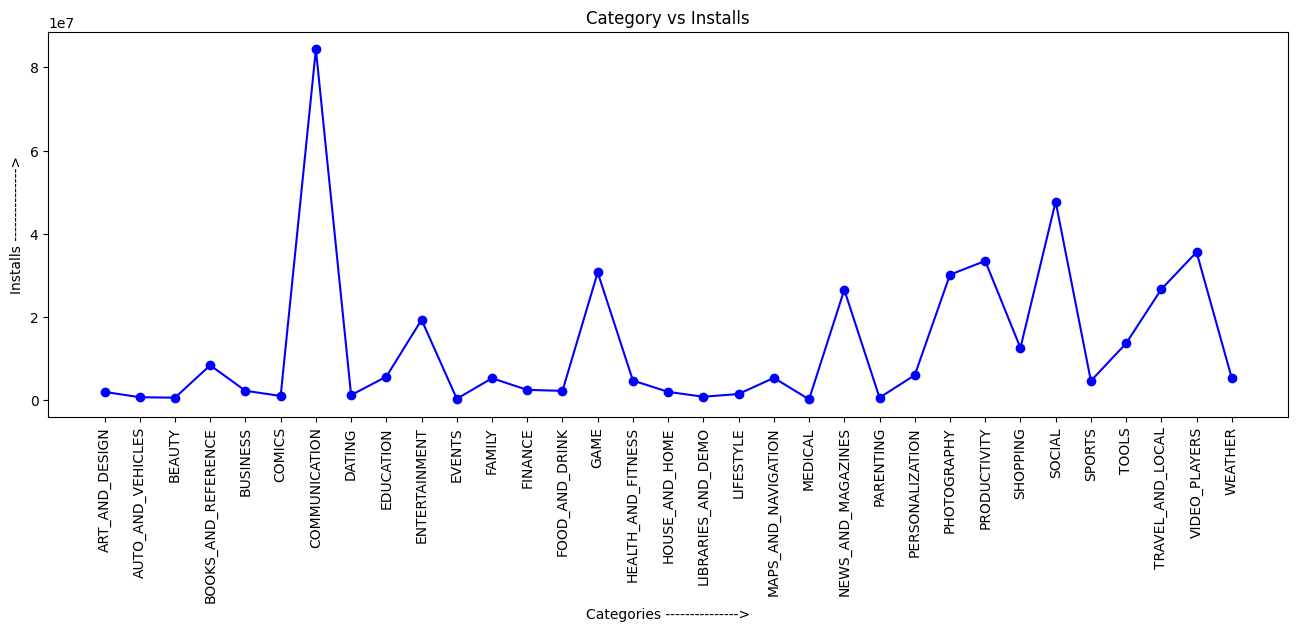

In [38]:
# below we've plot Category vs Installs plot

plt.figure(figsize=(16,5))
plt.plot(x, 'ro-', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories --------------->')
plt.ylabel('Installs --------------->')
plt.show()

<ipython-input-39-3a3c3a1c153a>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(z, 'ro-', color='b')


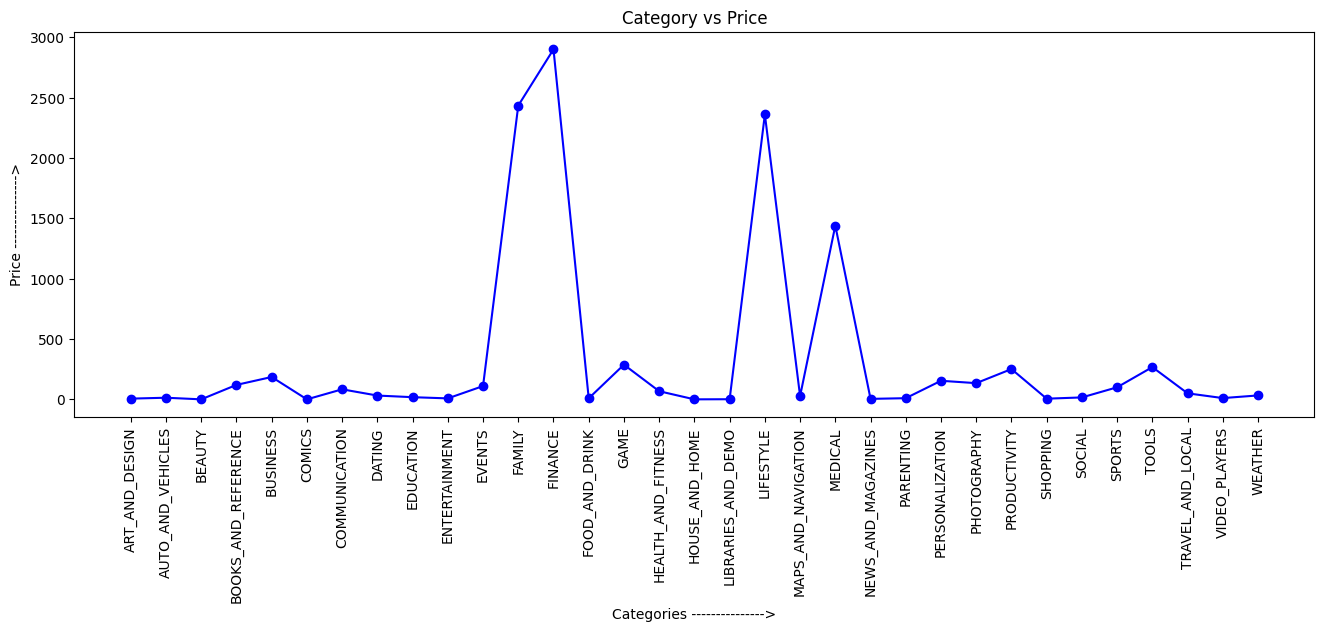

In [39]:
# below we've plot Category vs Price plot

plt.figure(figsize=(16,5))
plt.plot(z, 'ro-', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Price')
plt.xlabel('Categories --------------->')
plt.ylabel('Price --------------->')
plt.show()

<ipython-input-40-0f5af077ef4c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y, 'ro-', color='b')


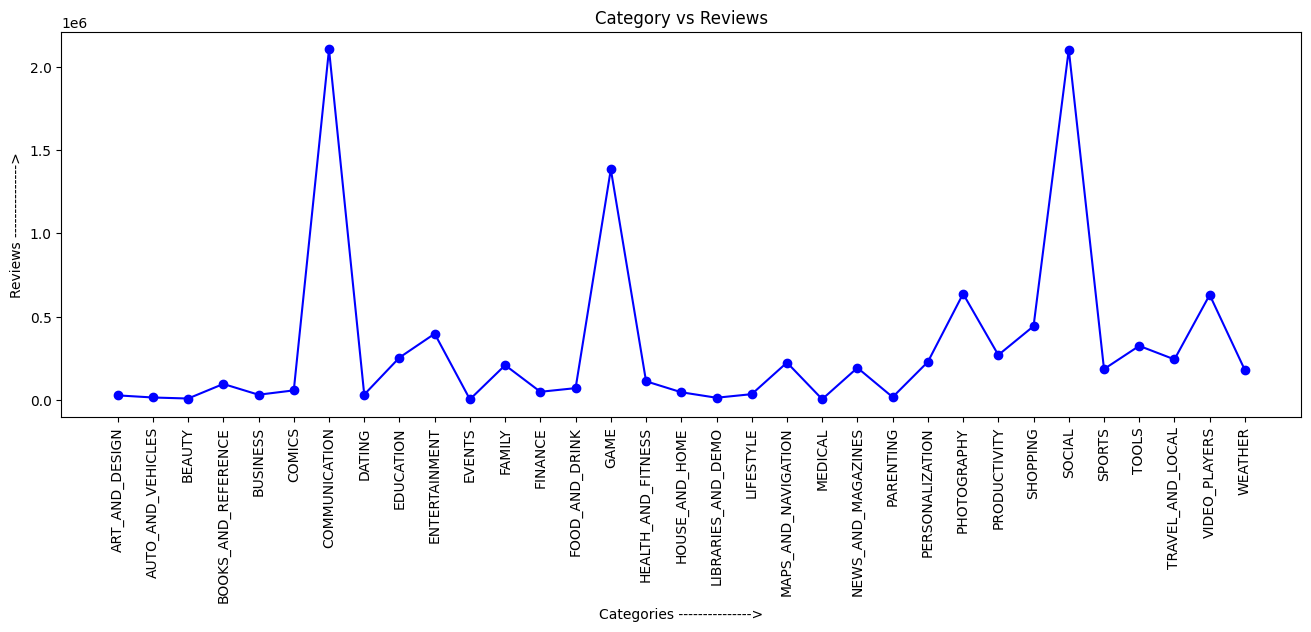

In [40]:
# below we've plot Category vs Reviews plot

plt.figure(figsize=(16,5))
plt.plot(y, 'ro-', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories --------------->')
plt.ylabel('Reviews --------------->')
plt.show()

In [41]:
df.duplicated().sum()

483

In [42]:
df.groupby(df.duplicated()).count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
False,10357,10357,10357,10357,10357,10357,10357,10357,10357,10357,10357,10357,10357
True,483,483,483,483,483,483,483,483,483,483,483,483,483


In [43]:
df.loc[df.duplicated(),:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000.0,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,10000000.0,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000.0,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000.0,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000.0,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,10000000.0,Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,1000000.0,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,100000000.0,Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000.0,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [44]:
df[df['App'] == 'Quick PDF Scanner + OCR Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
df = df.drop_duplicates()

In [46]:
df.shape

(10357, 13)

In [48]:
df.duplicated(subset= ["App","Category","Rating","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]).sum()

575

In [50]:
df = df.drop_duplicates(subset= ["App","Category","Rating","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"])

In [51]:
df.shape

(9782, 13)

In [52]:
df[df.duplicated(subset =['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
436,Call Blocker,COMMUNICATION,4.1,17529,10M,1000000.0,Free,0.0,Everyone,Communication,"July 26, 2018",5.86,4.0.3 and up
1973,Solitaire,GAME,4.7,154264,12M,10000000.0,Free,0.0,Everyone,Card,"June 8, 2018",Varies with device,Varies with device
2010,Word Search,GAME,4.2,344585,Varies with device,50000000.0,Free,0.0,Everyone,Word,"July 2, 2018",Varies with device,Varies with device
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,50000000.0,Free,0.0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20M,10000000.0,Free,0.0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,100000000.0,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25M,10000000.0,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,50000000.0,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,10000000.0,Free,0.0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [53]:
df[df["App"]=="Solitaire"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1656,Solitaire,GAME,4.7,254258,23M,10000000.0,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1973,Solitaire,GAME,4.7,154264,12M,10000000.0,Free,0.0,Everyone,Card,"June 8, 2018",Varies with device,Varies with device
2024,Solitaire,FAMILY,4.4,685,26M,100000.0,Free,0.0,Everyone,Card;Brain Games,"July 16, 2018",1.7.101,4.1 and up


In [54]:
def df_info():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp["count of non null values"] = df.count()
    temp['NaN values'] = df.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(df)).round(4)*100 # or cleaned_PS.isnull().mean()
    temp['unique_count'] = df.nunique()
    return temp 
df_info()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,9782,0,0.0,9659
Category,object,9782,0,0.0,33
Rating,float64,9782,0,0.0,39
Reviews,int64,9782,0,0.0,5439
Size,object,9782,0,0.0,461
Installs,float64,9782,0,0.0,20
Type,object,9782,0,0.0,2
Price,float64,9782,0,0.0,92
Content Rating,object,9782,0,0.0,6
Genres,object,9782,0,0.0,119


We have removed the NaN and Outlier from our Dataset

In [55]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [57]:
# Converting the "Last Updates" column dataType to datetime Type.

df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

<ipython-input-57-d28e8f674063>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Updated'] = pd.to_datetime(df['Last Updated'])


0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9782, dtype: datetime64[ns]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9782 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9782 non-null   object        
 1   Category        9782 non-null   object        
 2   Rating          9782 non-null   float64       
 3   Reviews         9782 non-null   int64         
 4   Size            9782 non-null   object        
 5   Installs        9782 non-null   float64       
 6   Type            9782 non-null   object        
 7   Price           9782 non-null   float64       
 8   Content Rating  9782 non-null   object        
 9   Genres          9782 non-null   object        
 10  Last Updated    9782 non-null   datetime64[ns]
 11  Current Ver     9782 non-null   object        
 12  Android Ver     9782 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.0+ MB


We've converted "Last Updated" column to datetype successfully

## ***1. Top categories on Google Playstore?***

In [59]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [60]:
df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1911
GAME                    963
TOOLS                   831
BUSINESS                421
MEDICAL                 400
PRODUCTIVITY            377
PERSONALIZATION         376
LIFESTYLE               369
FINANCE                 346
SPORTS                  328
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             285
NEWS_AND_MAGAZINES      256
SOCIAL                  240
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                208
DATING                  172
VIDEO_PLAYERS           166
MAPS_AND_NAVIGATION     133
EDUCATION               119
FOOD_AND_DRINK          114
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  80
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [61]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

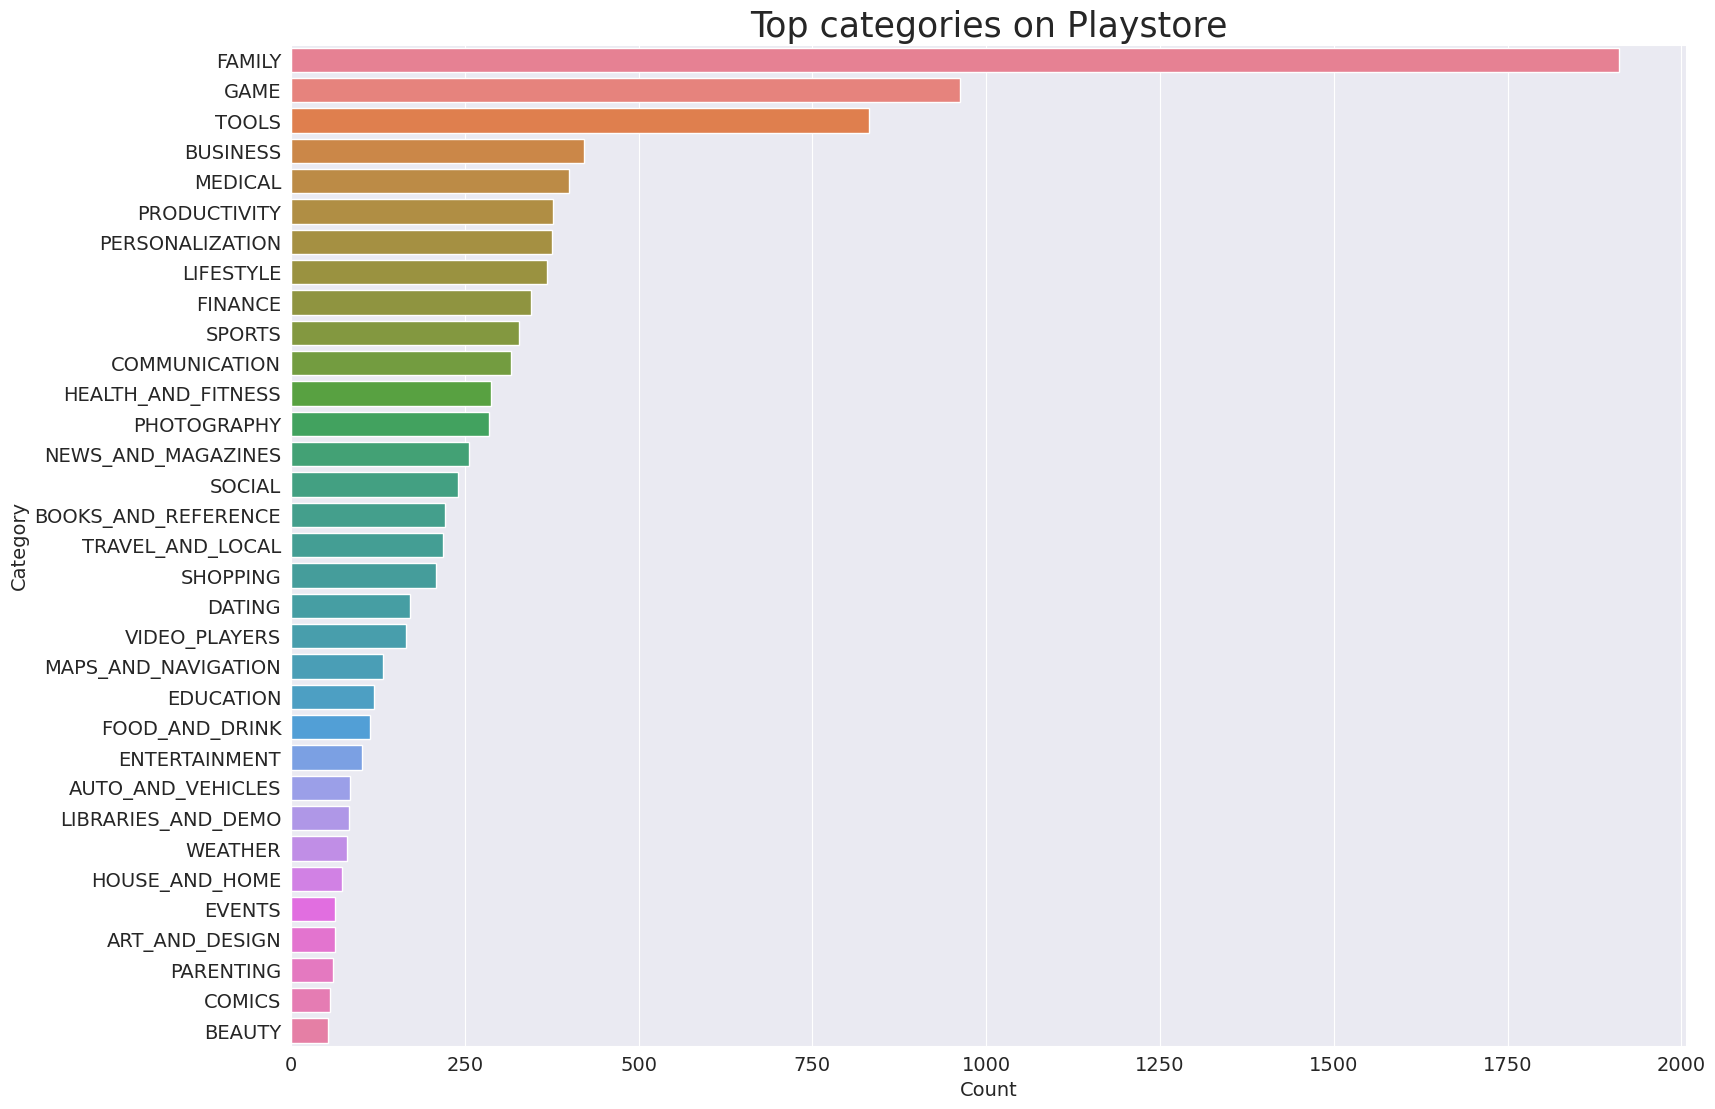

In [62]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Playstore", fontsize = 25);

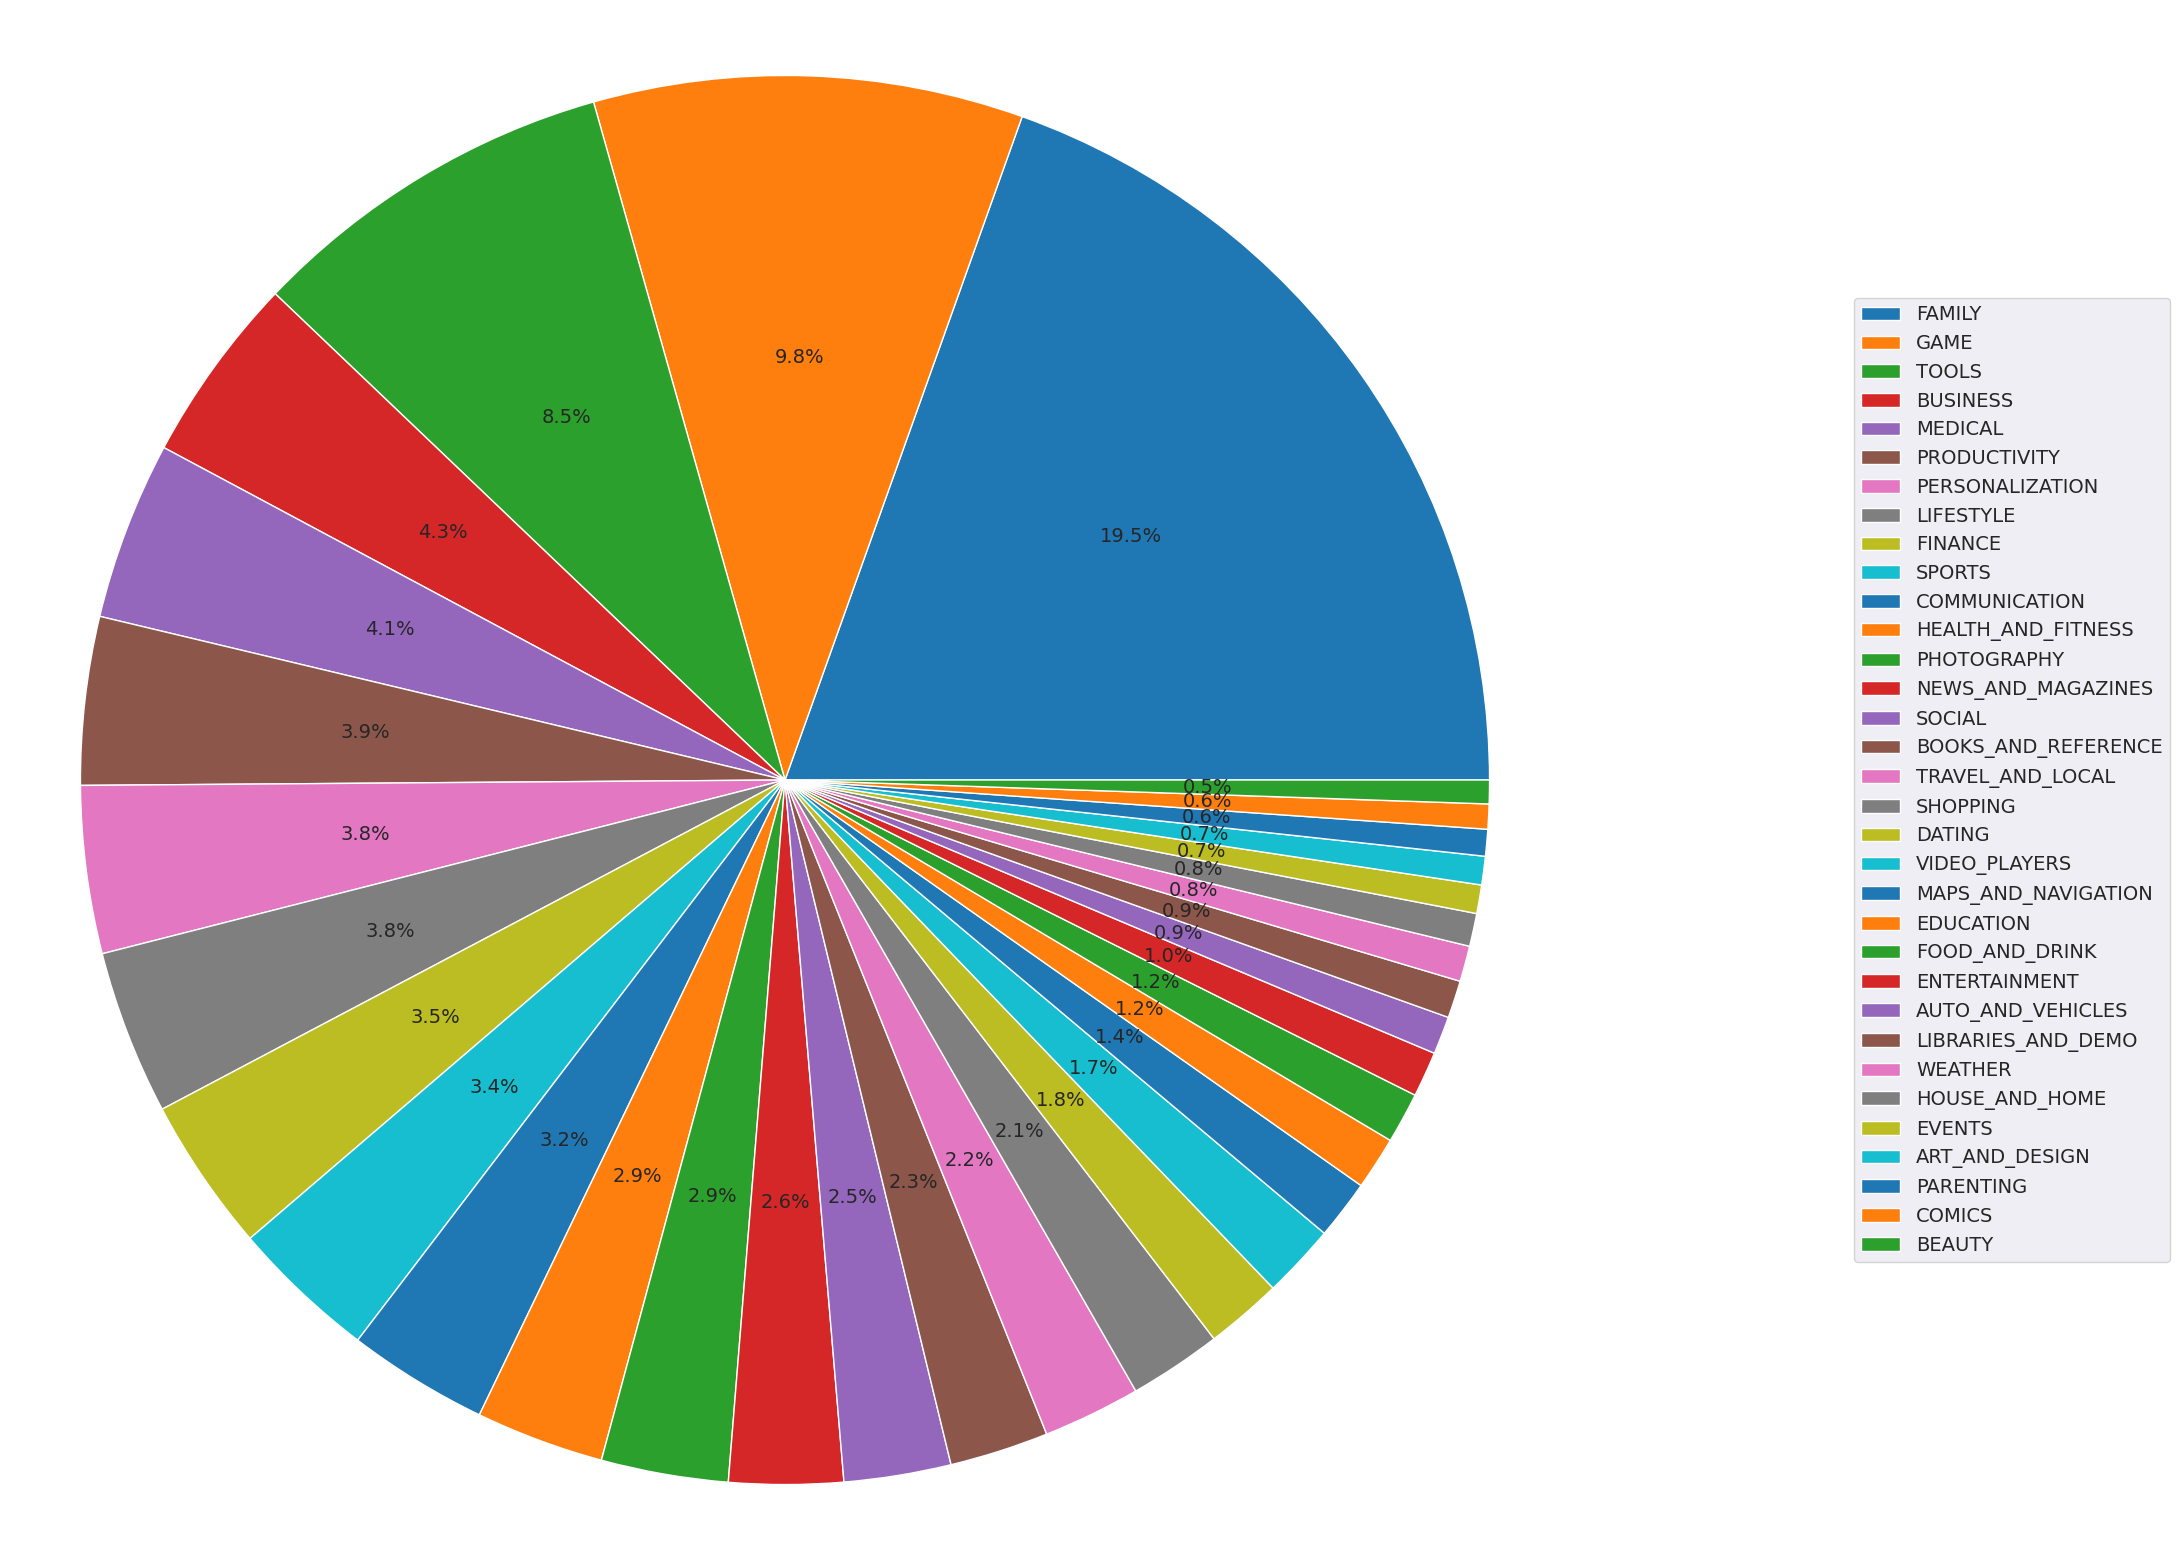

In [63]:
#Basic pie chart to view distribution of apps across various categories

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

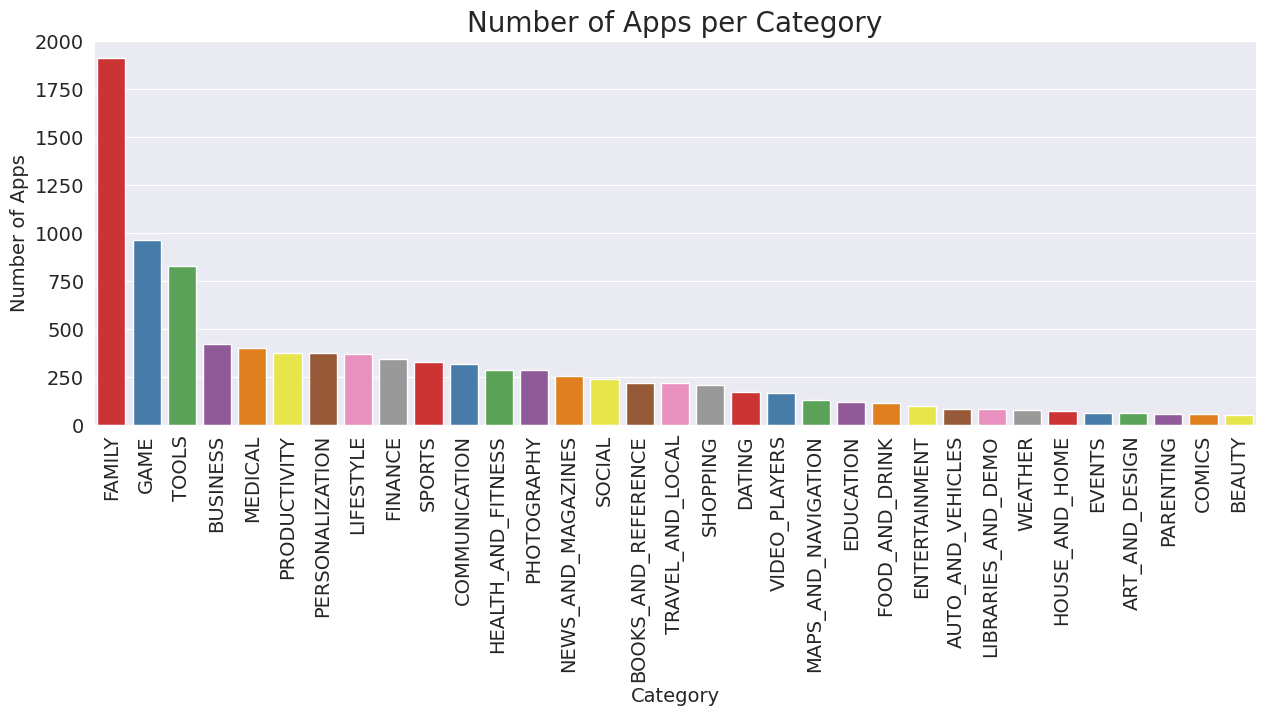

In [64]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Category', data=df, palette="Set1", order = df['Category'].value_counts().index)
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category", size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)

**Findings:** 

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore **most** of the apps are under **FAMILY** & **GAME** category and **least** are of **EVENTS** & **BEAUTY** Category.

## ***2. Which category of Apps from the Content Rating column are found more on playstore ?***

In [66]:
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

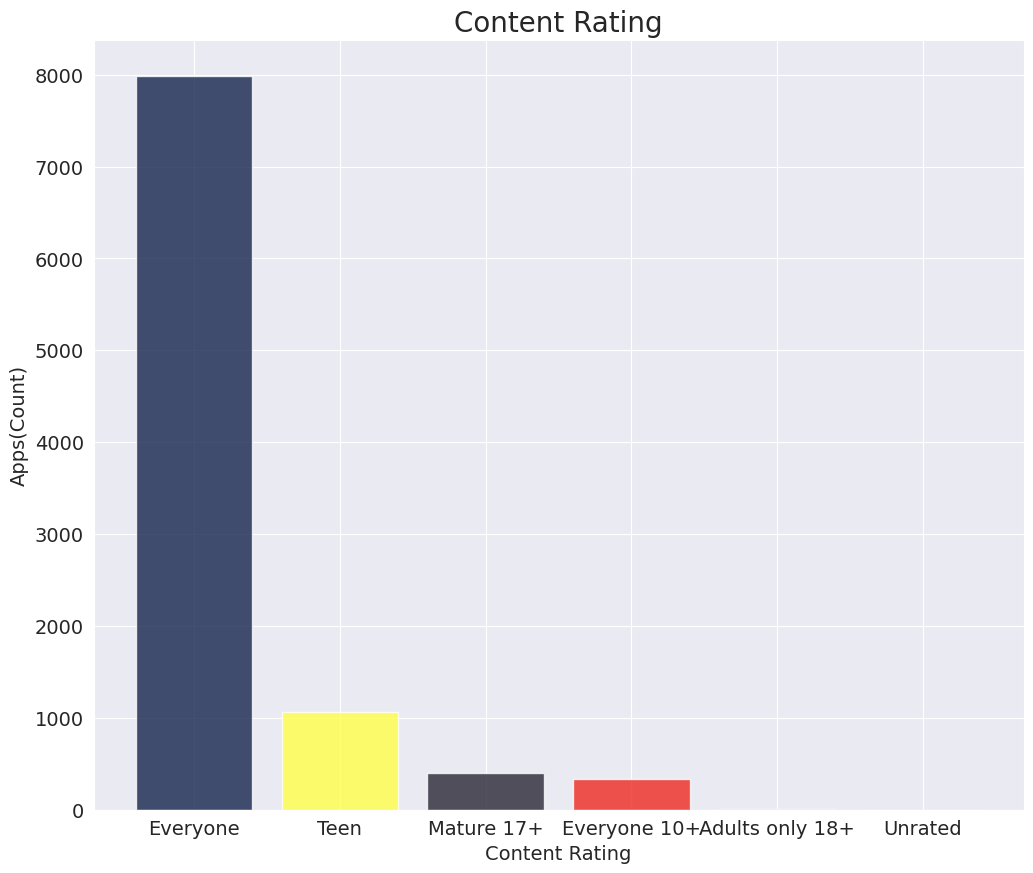

In [67]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

**Findings:** 

From the above plot we can see that **Everyone** category has the **highest** number of apps.

## ***3. Distribution of the ratings of the apps?***

<ipython-input-68-c4745c8d2dfa>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(df.Rating, color="Blue", shade = True)


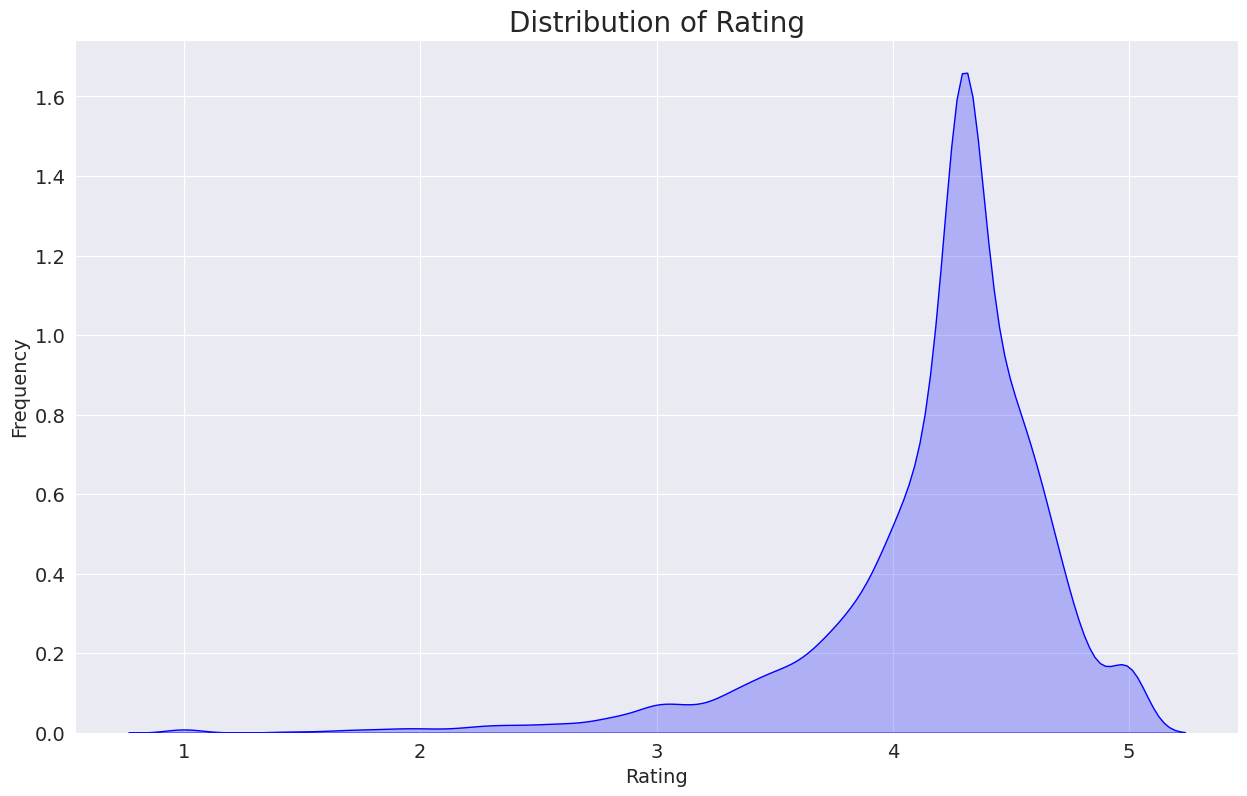

In [68]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

**Findings:** 

From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between **3.5 to 4.8**

## ***4. What portion of the apps in playstore are paid and free?***

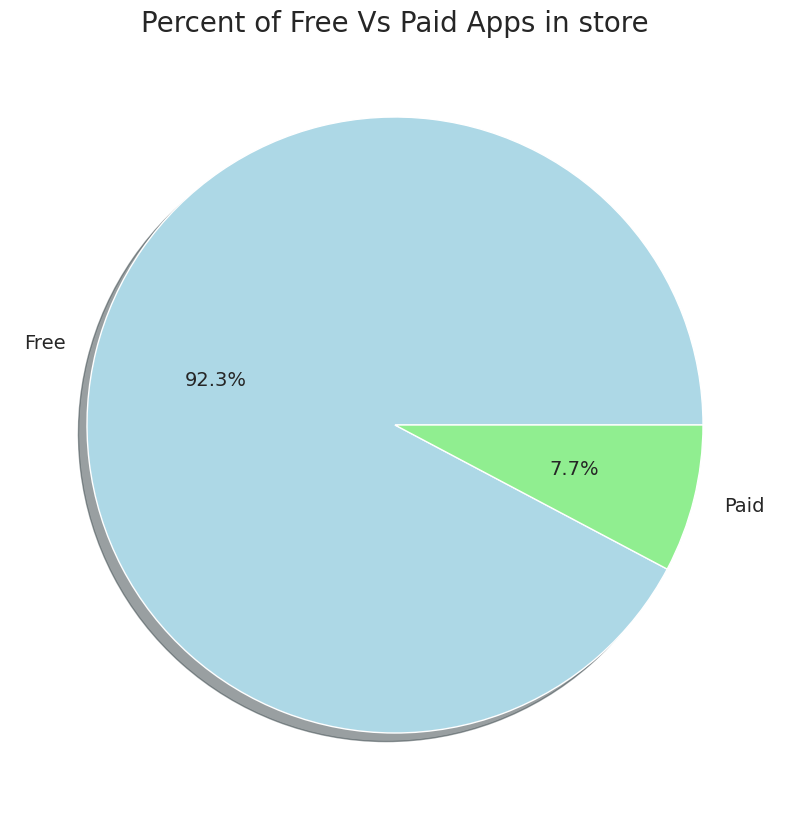

In [69]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["lightblue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode= None,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**Findings**: 

From the above graph we can see that **93%**(Approx.) of apps in google play store are **free** and **7%**(Approx.) are **paid**.

## ***5. Which category App's have most number of installs?***

In [71]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

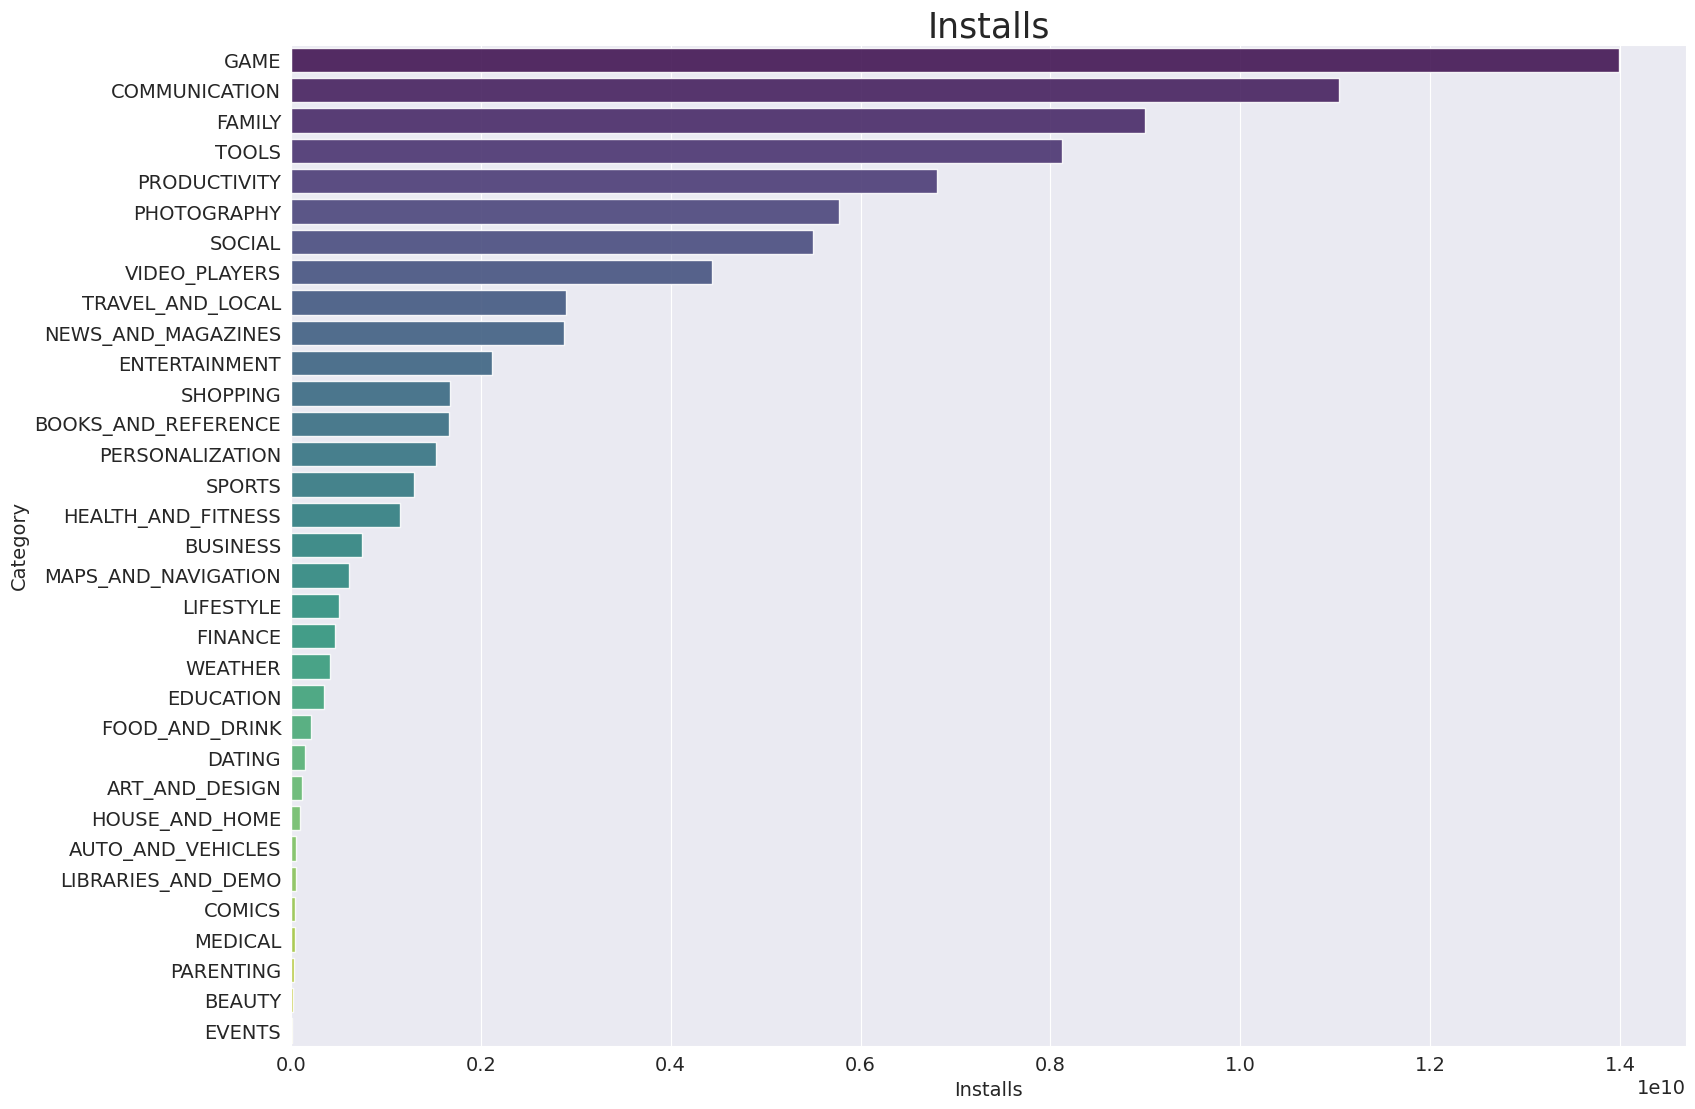

In [72]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**Findings:** 

From the above visualization, it can be interpreted that the top categories with **highest** installs are **Game, Communication,Family,Tools, Productivity.**

## ***6. What are the Top 10 installed apps in any category?***

In [74]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

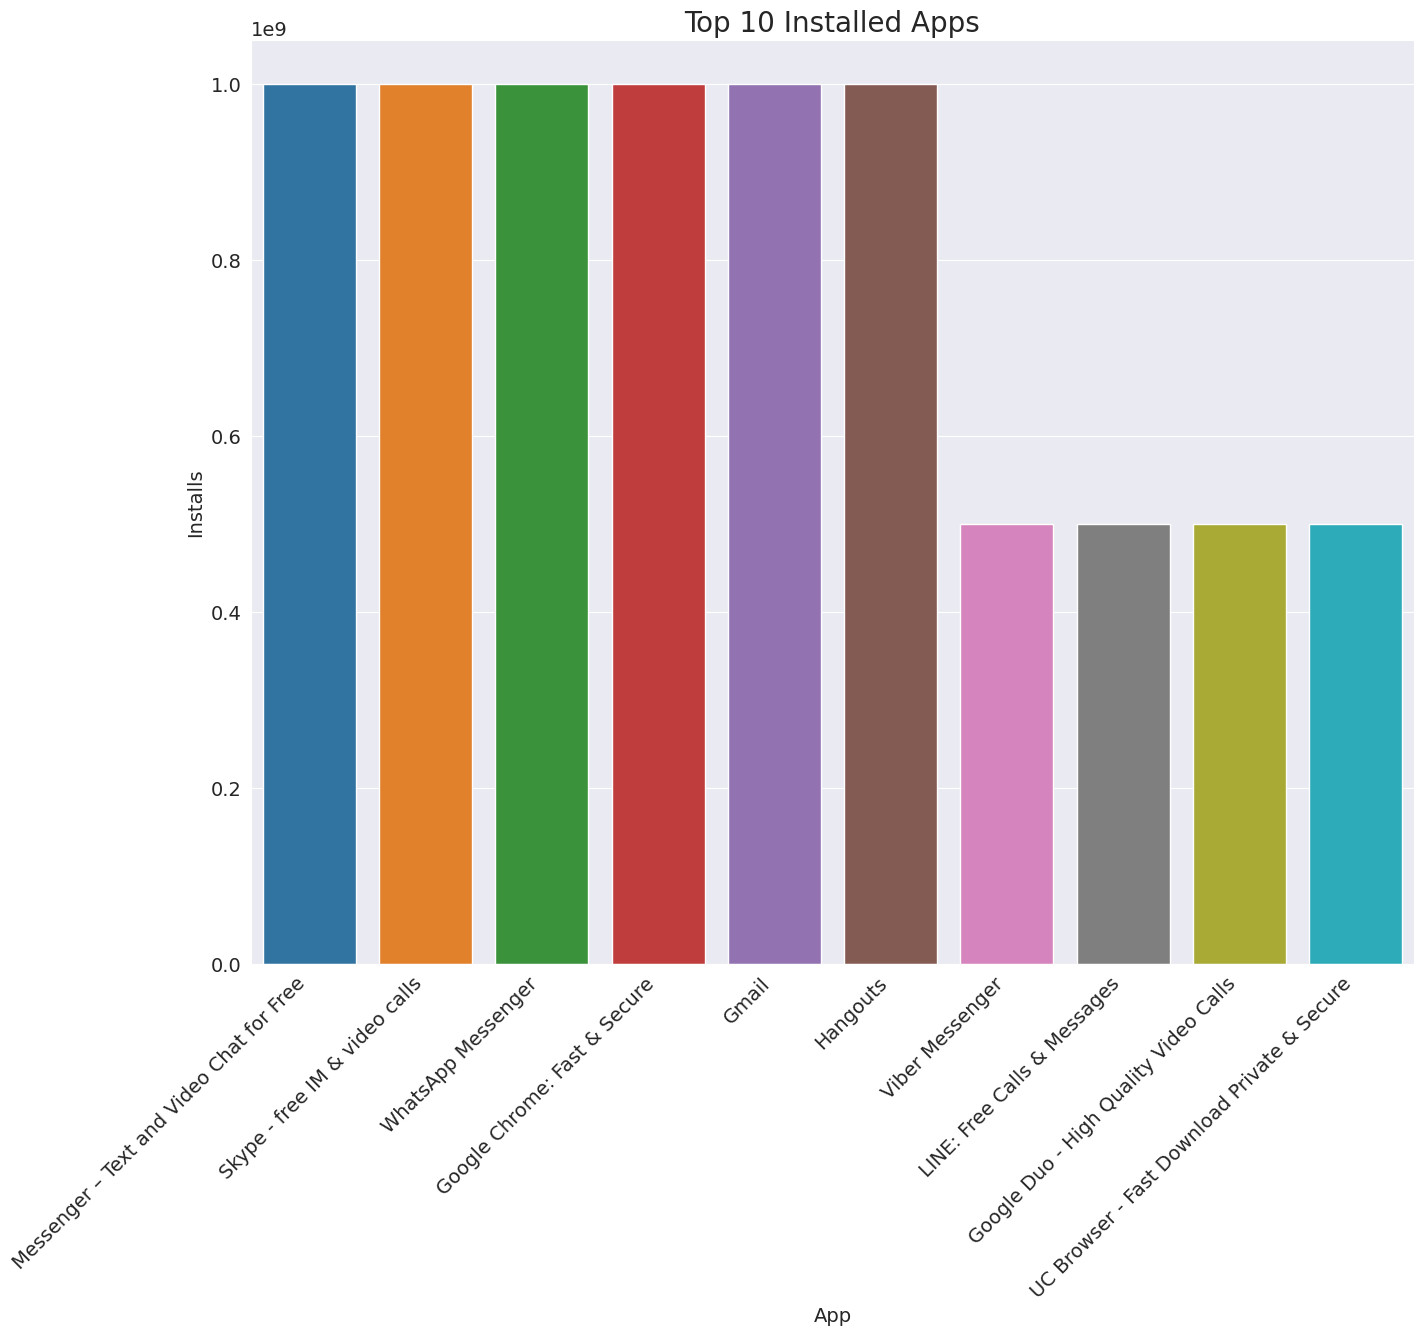

In [75]:
findtop10incategory('Communication')

**Findings:** 

From the above graph we can see that in the **Communication category Messenger- Text and Video Chat for Free, WhatsApp Messenger,Gmail has the highest installs.** In the same way we by passing different category names to the function, we can get the top 10 installed apps.

## ***7. Which are the top 10 expensive Apps in playstore?***

In [76]:
top10PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

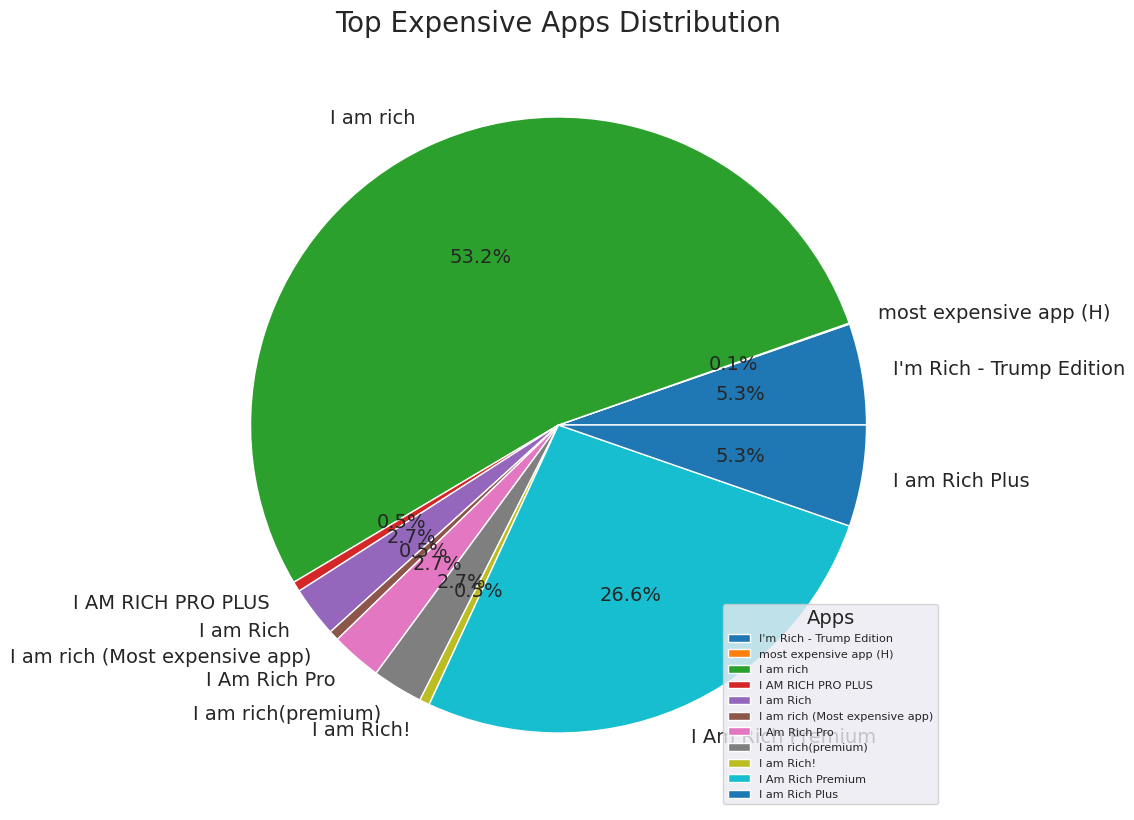

In [78]:
plt.figure(figsize=(15,10));
plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

**Findings:** 

From the above graph we can interprete that the **I am Rich** app is the **most expensive app** in the play_store. But this seems to be like a junk app. We need to further analyze if it is a junk app or not by deploying machine learning models in it.




# ***8.What are the count of Apps in different genres?***

In [79]:
topAppsinGenres = df['Genres'].value_counts().head(40)

In [80]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

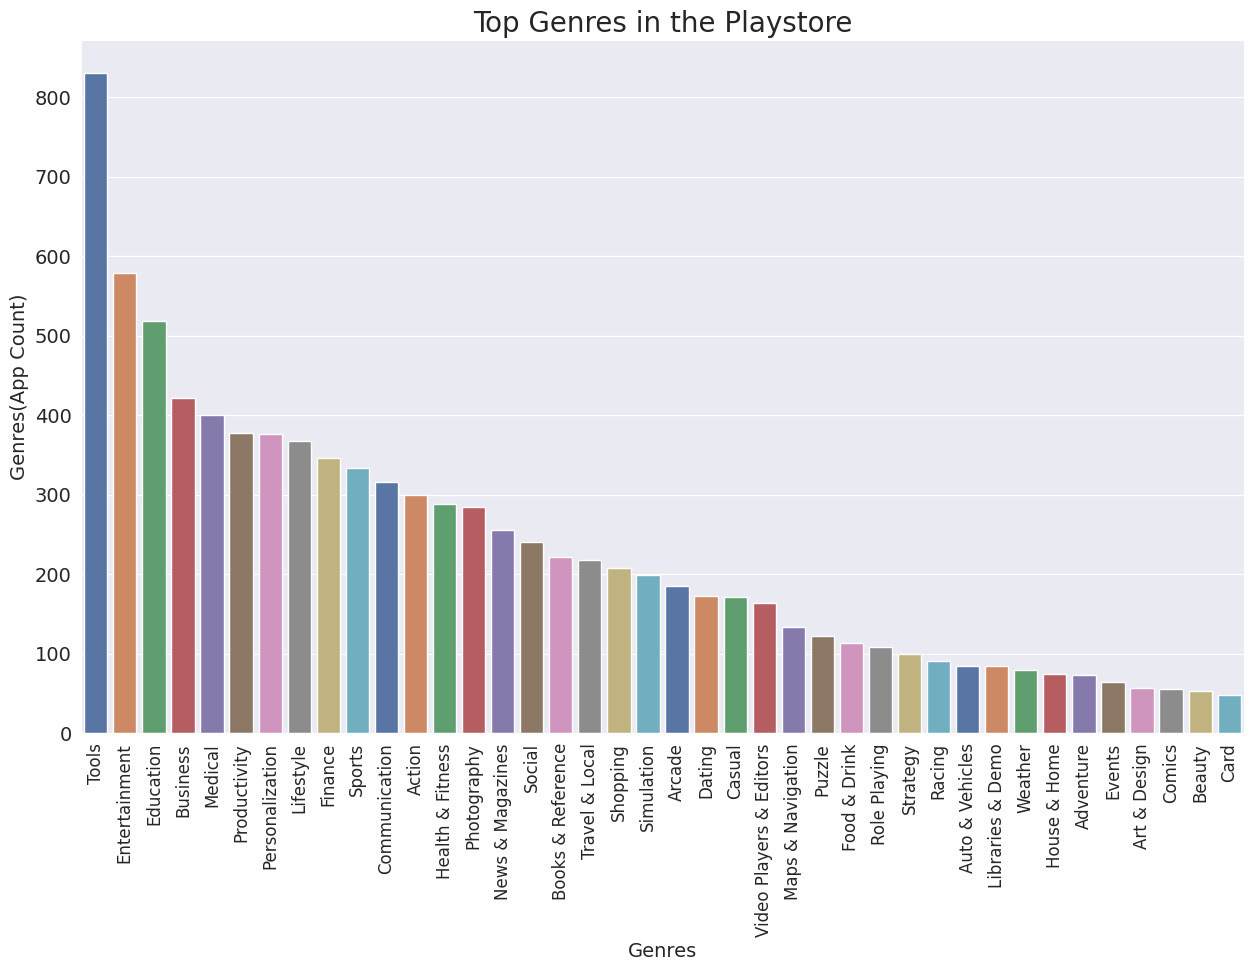

In [81]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

**Findings:** 

From the above visualization we can see that the Highest Number of Apps found in the **Tools and Entertainment genres followed by Education, Productivity, Finance** and many more.

# ***9. Android version based on each category***

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [83]:
df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0', inplace=True)

Category        Android Ver
ART_AND_DESIGN  4.0            51
                2.0             9
                3.0             2
                1.0             1
                5.0             1
                               ..
WEATHER         4.0            38
                1.0            24
                2.0            10
                5.0             7
                3.0             1
Name: Android Ver, Length: 199, dtype: int64


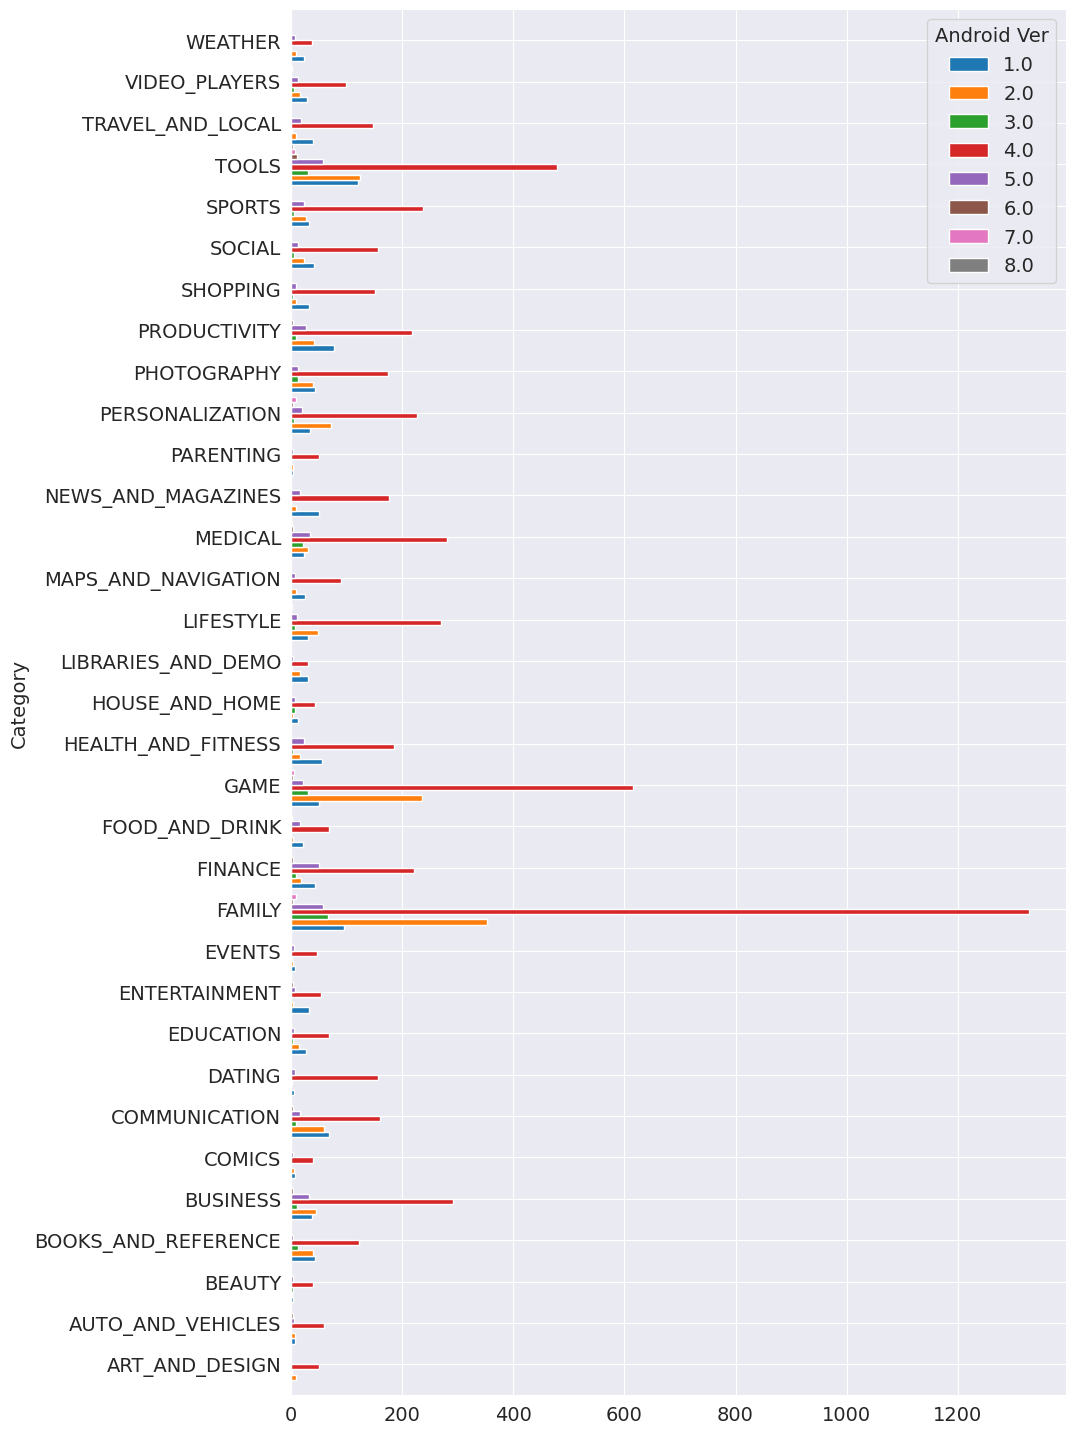

In [85]:
print(df.groupby('Category')['Android Ver'].value_counts())
Type_cat = df.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()

**Findings:** 

It is clearly evident from the above plot that majority of the apps are working on **Android_Ver 4.0 and up**.

# ***10. Let us try to understand and co-relate rating, reviews and price columns together.***

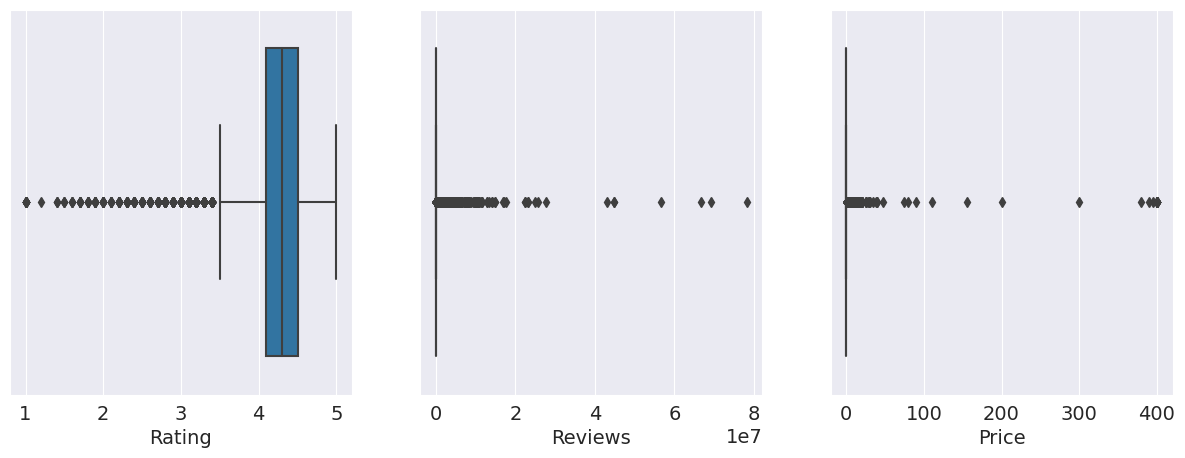

In [86]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.boxplot(x='Rating',data=df,ax=ax1)
sns.boxplot(x='Reviews',data=df,ax=ax2)
sns.boxplot(x='Price',data=df,ax=ax3)
f.set_size_inches(15, 5)

**Findings:** 

1. We can see that most of the Ratings are between 4 and around 4.5 and 5.

2. As far as Reviews are concerned, for most of the Apps Reviews are not given.

3. Also for Price, most of the Apps are Free.

# ***11. Let us get some insight about the ratings for each category***
 


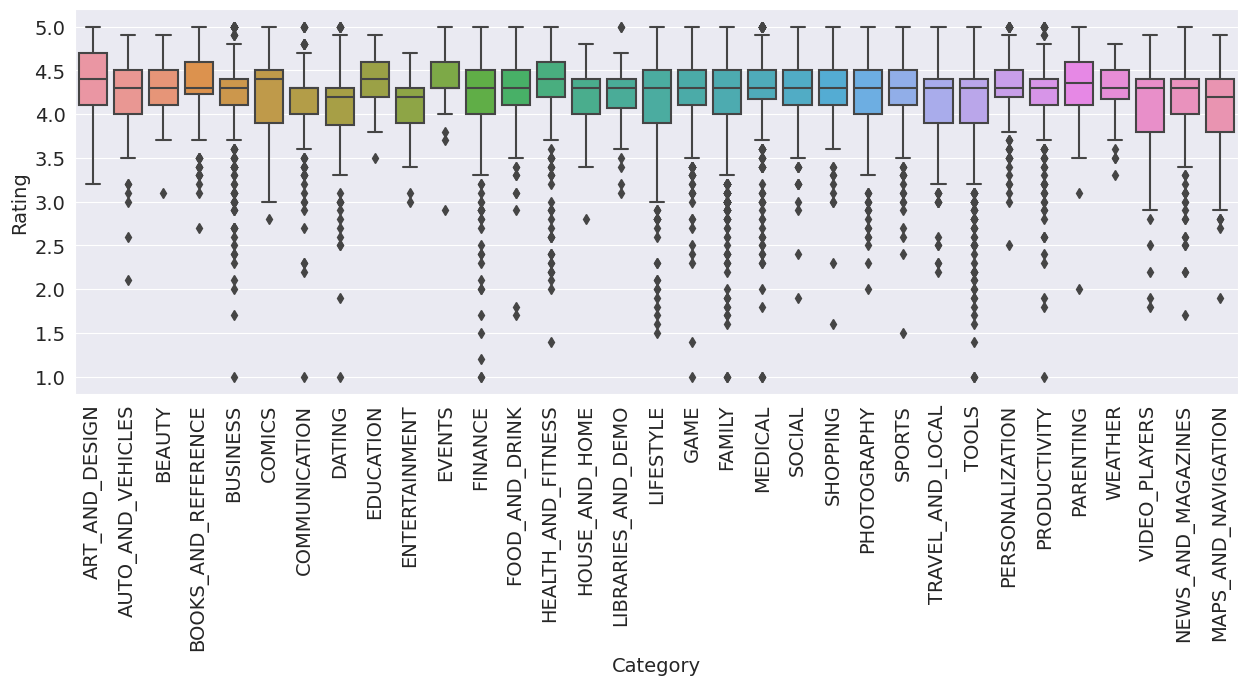

In [87]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=df)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

#***12. Well, it would be interesting to see if there is any relationship between Ratings vs Reviews. Does more number of reviews means more ratings?***

From the below plot, we cannot say that there is a relation, it seems that irrespective of the Reviews, the ratings are majorly between 4 and 5, which we also noticed before.

Also it is not correct to assume that rating and reviews have a relationship because reviews can be positive or negative and increase in the number of reviews does not show whether.  the Reviews are Positive or Negative.

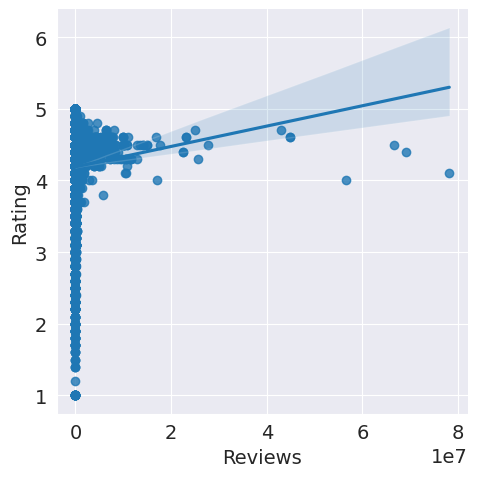

In [89]:
g = sns.lmplot(x = 'Reviews',y='Rating',data=df)

# ***13. Does the last update date has an effect on rating?***


In [94]:
print(df['Last Updated'].head())
#fetch update year from date
df["Update_year"] = df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


In [95]:
df.groupby("Update_year")["Rating"].count()

Update_year
2010       1
2011      15
2012      26
2013     108
2014     203
2015     452
2016     780
2017    1802
2018    6395
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Update Year VS Rating')

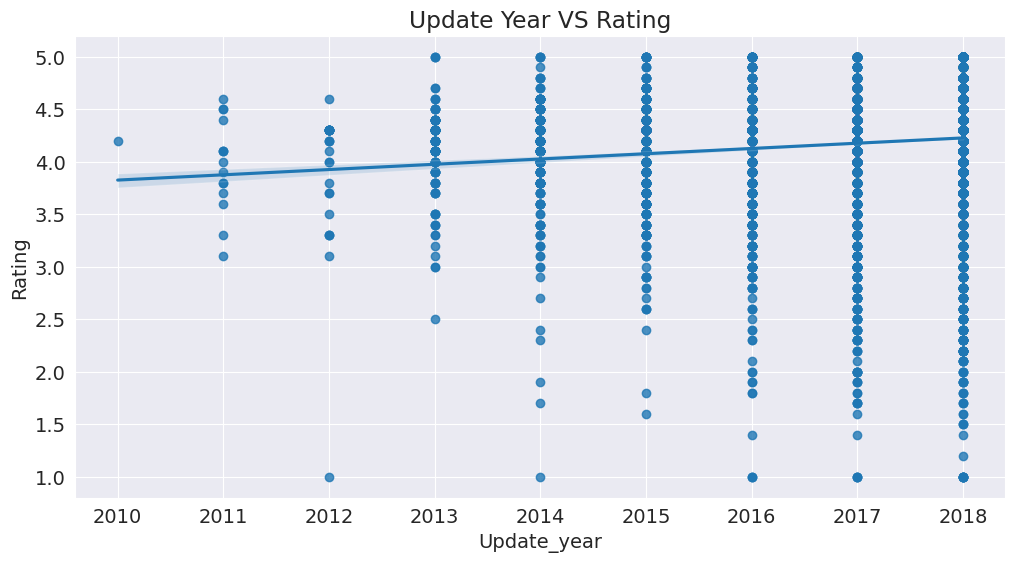

In [96]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update_year", y="Rating", data=df)
plt.title("Update Year VS Rating")

**Findings:** 

From above graph, we can conclude, the app gets more recent updates chances of getting a higher rating increases.

# ***14. Do price of the app effects the rating?***

Text(0.5, 1.0, 'Price VS Rating')

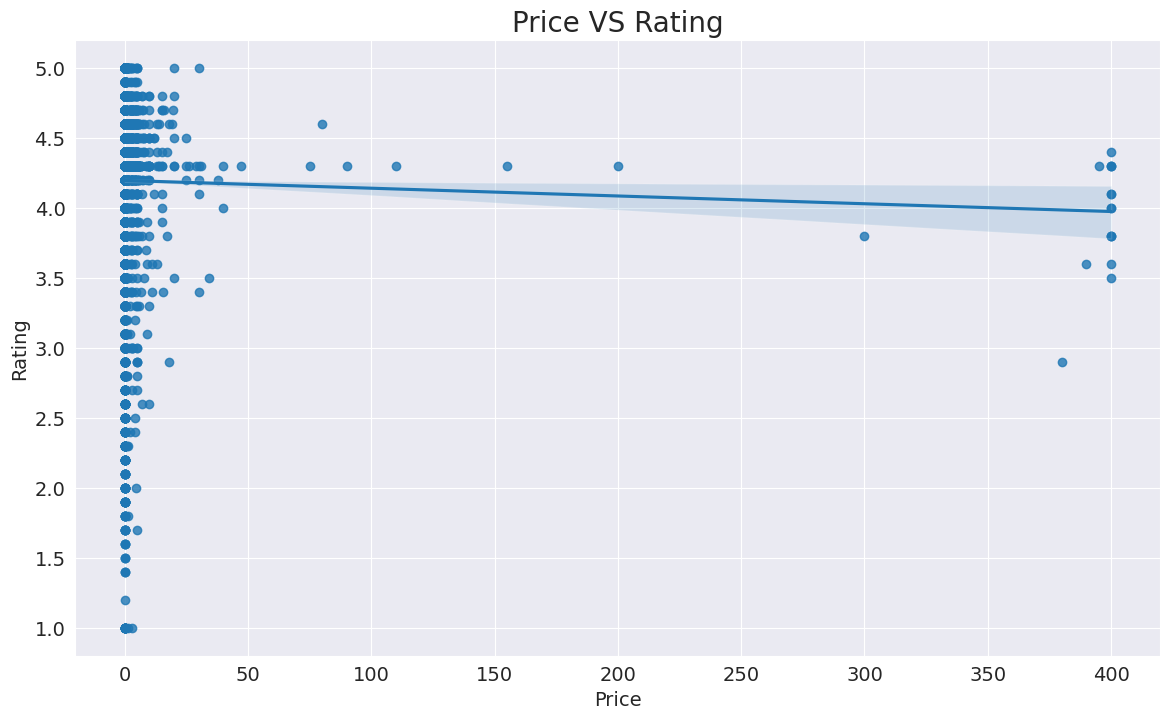

In [97]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Rating", data=df)
plt.title("Price VS Rating", size=20)

**Findings:** 

Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore.

# **Conclusion**

In this project of analyzing play store applications, we have worked on several parameters which would to do well in launching of apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give the best results out of our analysis.

App-Develpoers needs to focus more on:
1. Developing apps related to the least categories as they are not explored much. Like events and beauty.
2. Most of the apps are Free, so focusing on free app is more important.
3. Focusing more on content available for Everyone will increase the chances of getting the highest installs.
4. They need to focus on updating their apps regularly, so that it will attract more users.
5. They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.



**Thank You**

*Kindly ignore the grammatical and spelling errors, if any. Apologies for the inconvenience caused.*